# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the t or z statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.weightstats as wstats
import math
%matplotlib inline

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


<div class="span5 alert alert-info">
<ol>
    <li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
</ol>
</div>

In [6]:
#x_axis = df.temperature
#x_axis
#y_axis =

# the statistical significance value is 5%
stat_significance =0.05
# to test normal distibution , in step 1, scipy normaltest function
chi_value,p_value=stats.normaltest(df.temperature)
#help(stats.normaltest)
print('Chi value: '+ str(chi_value))
print('P value: '+ str(p_value))

if (p_value>stat_significance):
    print('This distribution seems to be normal distribution')
else:
    print('This distribution is not a normal distribution')

Chi value: 2.70380143332
P value: 0.258747986349
This distribution seems to be normal distribution


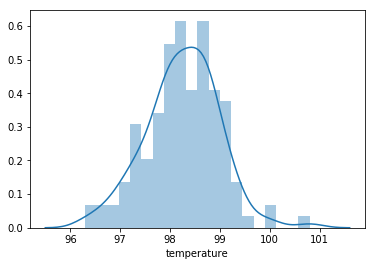

In [7]:
# check by plotting the graph
sns.distplot(df.temperature,bins=20)
#df.temperature.plot('hist')

<div class="span5 alert alert-info" style='background-color:#ffff66; color:black'><b>Answer :</b> With above graph and p value, the graph can be considered as normal disribution</div>

<div class="span5 alert alert-info">
<ol start='2'>

<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
</ul>
</ol>
</div>

In [8]:
print('The total number of records in data set is ' +str(len(df)))

The total number of records in data set is 130


<div class="span5 alert alert-info" style='background-color:#ffff66; color:black'><b>Answer :</b> The length more then 30 is considerd as large data set. So 130 will be consdered as large data set.</div>

<div class="span5 alert alert-info">
<ol start='3'>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the t or z statistic? 
    <li> Now try using the other test. How is the result be different? Why?
  </ul></ol>
</div>

<div class="span5 alert alert-info">

    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    </ul>
</div>

<div class="span5 alert alert-info" style='background-color:#ffff66; color:black'><b>Answer :</b> In this scenario <b>One-sample</b> test should be used because all tempratures are being consdered as <b>single</b> group and <b>NOT</b> as two seprate group male or female .</div>

<div class="span5 alert alert-info">

    <ul>
    <li> In this situation, is it appropriate to use the t or z statistic? 
    </ul>
</div>

<div class="span5 alert alert-info" style='background-color:#ffff66; color:black'><b>Answer :</b> In this situation <b>Z statistics</b> should be user as sample is <b>large</b> enough to utilize z statistics. The t statics is used <b>ONLY</b> when  group size is small, which is <b>NOT</b> the case in this scenario .</div>

In [9]:
sample_mean,sample_sd=df.temperature.mean(),df.temperature.std()
expected_mean=98.6
print('The sample mean is '+str(sample_mean) +', expected mean is '+str(expected_mean) +' and sample standard deviation is '+ str(sample_sd))

The sample mean is 98.24923076923078, expected mean is 98.6 and sample standard deviation is 0.7331831580389454


<div>
<b>Hypothesis</b>
<br>
<i>The Null Hypothesis</i> : The normal temprature is <i>98.6</i> . Normal temprature = <i>98.6</i>
<br>
<i>The Alternate Hypothesis</i> : The normal temprature is <b>NOT </b><i>98.6</i> .Normal temprature><i>98.6</i> or Normal temprature < <i>98.6</i> 
</div>

In [10]:
#z_score =stats.zscore(df.temperature)
z_score = (sample_mean-expected_mean)/(sample_sd/math.sqrt(130))
print('The z score for sample mean is ' +str(z_score))

The z score for sample mean is -5.454823292364079


In [11]:
p_value=stats.norm.cdf(z_score)
print('The z value from the p value above is '+str(p_value))

The z value from the p value above is 2.45107850706e-08


In [12]:
# p value less then 5% suggest that sample mean is far in normal distribution curve and hence null hypothesis is failed
if (p_value<stat_significance):
    print ('The p value is smaller then statistical significance value hence reject the null hypothesis')
else:
    print('Null hypotheses is true')

The p value is smaller then statistical significance value hence reject the null hypothesis


<div class="span5 alert alert-info" style='background-color:#ffff66; color:black'><b>Answer :</b> The p value less then 5% suggest that sample mean is far in normal distribution curve as hypothesis mean(<b>98.6</b>) and hence null hypothesis is <b>rejected</b> .</div>

<div class="span5 alert alert-info">

    <ul>
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
</div>

In [13]:
# calculating t value and p value for Null hypothesis
t_value,p_value=stats.ttest_1samp(df.temperature, 98.6)
#print(t_value)
#print(p_value)
print('The t-value is '+str(t_value) +', and p-value is '+ str(p_value))

The t-value is -5.45482329236, and p-value is 2.41063204156e-07


In [14]:
# p value less then 5% suggest that sample mean is far in normal distribution curve and hence null hypothesis is failed
if (p_value<stat_significance):
    print ('The p value is samller then statistical sigincance value hence reject the null hypothesis')
else:
    print('Null hypotheses is true')

The p value is samller then statistical sigincance value hence reject the null hypothesis


<div class="span5 alert alert-info" style='background-color:#ffff66; color:black'><b>Answer :</b> The p value less then 5% suggest that sample mean is far in normal distribution curve as hypothesis mean(<b>98.6</b>) and hence null hypothesis is <b>rejected</b> .</div>

<div class="span5 alert alert-info" style='background-color:#ffff66; color:black'><b>Answer :</b>Both the test provieds same  p values. The p value less then 5% is from both Z test and t test. </div>

<div class="span5 alert alert-info">
<ol start='4'>

<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>

</ol>
</div>

In [15]:
# for 95% the critcal z value is 1.96 ( based on z table)
critical_z_value =1.96
confidence_interval =(critical_z_value*sample_sd)/math.sqrt(130)
confidence_interval
print ('The confidence interval is '+ str(confidence_interval) +'. The margin of error range is between '+
       str(sample_mean-confidence_interval ) +' to '+str(sample_mean+confidence_interval ))

The confidence interval is 0.12603665700226638. The margin of error range is between 98.12319411222852 to 98.37526742623304


<div class="span5 alert alert-info" style='background-color:#ffff66; color:black'><b>Answer :</b>The confidence interval is <b><u>0.12603665700226638</u></b>. The margin of error range is between <b><u>98.12319411222852 </u></b>to <b><u>98.37526742623304</u></b>. </div>

<div class="span5 alert alert-info">
<ol start='5'>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    
    </ul>
</ol>
</div>

In [16]:
df_males=df[df.gender=='M']
df_females=df[df.gender=='F']


In [17]:
df_males.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [18]:
df_females.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


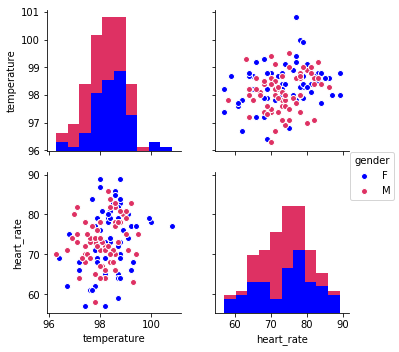

In [19]:
sns.pairplot(df, hue='gender',palette =('blue','#DE3163'))

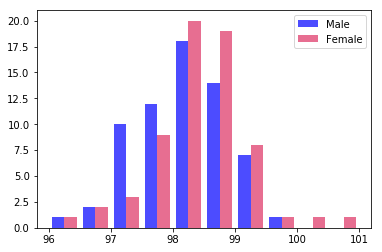

In [20]:
bins = np.linspace(96, 101, 11)
data = np.vstack([df_males.temperature, df_females.temperature]).T
plt.hist(data, bins, alpha=0.7, label=['Male', 'Female'],color=['blue','#DE3163'])
plt.legend(loc='upper right')

<div class="span5 alert alert-info" style='background-color:#ffff66; color:black'><b>Answer Part I:</b> The mean tempratue of female and male varies .The above graph displays that there is difference between male and female temprature. Further perfrom z test to clarify </div>

In [21]:

tstat, pvalue = wstats.ztest(df_males.temperature, df_females.temperature, alternative='two-sided',
                    value=0, usevar='pooled', ddof=1.0)
print ('The t stat is '+str(tstat)+ ' and p value is ' +str(pvalue))

The t stat is -2.28543453817 and p value is 0.0222873607607


<div>
<b>Hypothesis</b>
<br>
<i>The Null Hypothesis</i> : There normal temperature for males and females are same .Normal(Male) = Normal(Female)
<br>
<i>The alternate Hypothesis</i> : There normal temperature for males and females are <b>not</b> same .Normal(Male) > Normal(Female) or Normal(Male) < Normal(Female)
</div>

In [23]:
# sample mean calculation
male_sample_mean=df_males.temperature.mean()
female_sample_mean=df_females.temperature.mean()
diff_mean=male_sample_mean-female_sample_mean

# sample standard deviation
male_sample_std=df_males.temperature.std()
female_sample_std=df_females.temperature.std()
diff_std=male_sample_std-female_sample_std

# degrees of freedom 
male_degree_freedom=male_sample_std**2/65
female_degree_freedom=female_sample_std**2/65

degree_freedom=((female_degree_freedom+male_degree_freedom)**2)/(((female_degree_freedom**2)/64)+((male_degree_freedom**2)/64))

#margin of error 
margin_error=math.sqrt(df_males.temperature.var()+df_females.temperature.var())

# for 95% the critcal z value is 1.96 ( based on z table)
critical_value = critical_z_value *(margin_error/math.sqrt(65))

# p value less then 5% suggest that sample mean is far in normal distribution curve and hence null hypothesis is failed
if (critical_value<critical_z_value):
    print (('The critical value ({}) is samller then statistical significance ({}) value hence reject the null hypothesis').format(critical_value,critical_z_value))
else:
    print('Null hypotheses is true')

The critical value (0.24804574282285985) is samller then statistical significance (1.96) value hence reject the null hypothesis


<div class="span5 alert alert-info" style='background-color:#ffff66; color:black'>
<b>Answer Part II:</b> The null hypothesis is rejected .
The test value above further proved that there is significant difference between male and female average temprature.
</div>

<div class="span5 alert alert-info">

    <ul>
    <li>  Write a story with your conclusion in the context of the original problem.
    </ul>
</div>

<div class="span5 alert alert-info" style='background-color:#ffff66; color:black'>
<b>Answer:</b> 
<p>
Since 1868 normal body temprature of human is assumed to be 37$^{\circ}$C or 98.6$^{\circ}$F based on book by Carl Wunderlich. After 150 years we can check this assumption statistcally and further confrim this magic number is true or not.
</p>
<p>
After analyzing the body temparture from 65 males and 65 females, it was clear that 98.6 is not normal body temparture.<br/> But also that having single number for both male and female is also not correct. <br/>The study shows that normal human body temprature is between  98.12 to 98.38.<br/> And the females normally have slighlty higher body temprature as comapred to males    
</p>

</div>